# Electro Pi Scholarship
## Week 1: Foundation Level
### Objectives
After watching all the following primary cards you should start to :-
- Build a Python Script that would take any type of data as an input whether (`.csv` or `.xlsx`) that hold data with different type of errors that need to be corrected first then return an automated **Exploratory Data Analysis** Charts as an output.
- Sample Input: `data.xlsx`
- Desired Output: EDA for that data.

### Steps hint :-
1. load Data with conditions for different extensions such as `csv` or `xlsx`.
2. Check on variable types to know how to fix their errors and visualize relations correctly
3. start Data preprocessing to fill gabs and similar stuff with conditions.
4. Visualize charts with conditions for different column types.

### Datasets
1. **Retail Data**: https://www.kaggle.com/datasets/manjeetsingh/retaildataset
2. **Data Police Shooting**: https://www.kaggle.com/datasets/mrmorj/data-police-shootings


> When you finish this objective please upload your notebook with results on `GitHub` then send your `GitHub` repo link as an attachement for the assignment over the shcolership google class page.

----

# 01 Importing Modules

In [1]:
# import pandas, matplotlib and numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Show all columns' content
pd.set_option('display.max_colwidth', None)

# 02 Define the Automation Class `Dataset`

The class `Dataset` will take these inputs:
1. **`link_path`**: The `link` or `path` where the dataset locates.
2. **`drop_missing_ratio`**: The ratio of missing values inside a column to total number of values, it should be between `[0, 1]`, any column with ratio above or equal this value will be dropped, default value is `0`.
3. **`cat_cols_max_unique`**: The maximum number of unique values inside a non numeric columns to be plotted in the EDA, default is `15` and minimum value is `5`.

After creating your object using the `Dataset` class, you can run the automated cleaning and EDA using **`.output()`** method.

**Note**: All other methods used inside `Dataset` are **private**.

In [2]:
class Dataset:
    # Define the __init__ method 
    def __init__(self, link_path='', drop_missing_ratio=0, cat_cols_max_unique=15):
        # ---------------- Checking inputs ----------------
        # Check if link/path of dataset is entered
        if link_path == '':
            raise ValueError('Please enter the dataset link/path.')
        
        # Check the value of drop_missing_ratio is within the range
        if (drop_missing_ratio < 0) | (drop_missing_ratio > 1):
            raise ValueError('drop_missing_ratio should be between 0 and 1.')
        
        # Check if cat_cols_max_unique is an integer number above or equal 5
        if (cat_cols_max_unique < 5) | (type(cat_cols_max_unique) != int):
            raise ValueError('cat_cols_max_unique should be integer above or equal to 5.')
        
        # ---------------- Assign the inputs as object instances variables ----------------
        self.drop_missing_ratio = drop_missing_ratio
        self.cat_cols_max_unique = cat_cols_max_unique
  
        # ---------------- Checking link_path ----------------
        # try loading dataset in link_path in both csv or excel options, if passed then assign 
        # dataframe to 'df', otherwise print error message
        try:
            self.df = pd.read_csv(link_path)
            # call print_info() method to print loading details
            self.__print_info()
            return None
        # if not passed, then try read_excel
        except:
            pass
        
        try:
            self.df = pd.read_excel(link_path)
            # call print_info() method to print loading details
            self.__print_info()
            return None  
        except FileNotFoundError:
            # if file is not found then print error message
            print('File Not Found!')
        else:
            # print general error message if nothimg passed
            print('Unkown Error!')
            
    
    # define output method
    def output(self):
        # First section is printing general information of the dataframe
        print('---------- Dataframe informations ----------')
        print('1- Number of columns:', self.df.shape[1])
        print('2- Number of rows:', self.df.shape[0])
        print('3- First 5 rows:')
        display(self.df.head())
        print('4- Data Types:')
        self.num_cols, self.cat_cols, self.non_cat_cols = self.__data_types()
        
        # Second section is handling the missing values
        print('\n\n---------- Handling missing values ----------')
        self.__missing_values()
        
        # Third section will be EDA for numerical columns
        print('\n\n---------- EDA for numerical columns ----------')
        self.__eda_num_cols()
        
        # Forth section will be EDA for categorical columns
        print('\n\n---------- EDA for categorical columns ----------')
        self.__eda_cat_cols()
        
        # Fifth section will be EDA for non categorical columns
        print('\n\n---------- EDA for non categorical columns ----------')
        self.__eda_non_cat_cols()
        
    
    # define print_info method
    def __print_info(self):
        # print information after finish loading
        print('Loading of dataframe done successfully in your object...\n')
        print('We have three attributes in this object:')
        print(' 1- df: The dataframe is saved here.')
        print(' 2- drop_missing_ratio: the minimum ratio of missing data inside the columns to be dropped', 
            ' current value is {}.'.format(self.drop_missing_ratio))
        print(' 3- cat_cols_max_unique: the maximum number of unique values inside non numeric columns', 
            'any column has more than this number of unique values will not be plotted', 
            'current value is {}.\n'.format(self.cat_cols_max_unique))
        print('For the auto cleaning and EDA, call ".output()" method.')
        
        
    def __data_types(self):
        # Assign numerical columns in num_cols
        num_cols = self.df.select_dtypes(include=np.number).columns
        
        # Assign non numerical columns in non_num_cols
        non_num_cols = self.df.select_dtypes(exclude=[np.number]).columns
        
        # seperate non_num_cols to categorical and non categorical based on cat_cols_max_unique
        if len(non_num_cols) > 0:
            cat_cols = [col for col in non_num_cols if len([*self.df[col].unique()]) <= self.cat_cols_max_unique]
            non_cat_cols = [col for col in non_num_cols if len([*self.df[col].unique()]) > self.cat_cols_max_unique]
        
        # Show the three data types as dataframe
        display(pd.DataFrame.from_dict({'numeric': ', '.join(num_cols)if len(num_cols) > 0 else None, 
                                        'categorical': ', '.join(cat_cols)if len(cat_cols) > 0 else None,
                                        'non_categorical': ', '.join(non_cat_cols)if len(non_cat_cols) > 0 else None},
                                       orient='index', columns=['columns']))
        # return the three lists
        return num_cols, cat_cols, non_cat_cols
            
            
    def __missing_values(self):
        # take missing values as a dataframe
        df_missing = pd.DataFrame(self.df.isna().sum().sort_values(ascending=False),
                                  columns=['missing_count'])
        df_missing = df_missing[df_missing['missing_count'] > 0]
        
        if len(df_missing) > 0:
            # if we have missing values, calculate the missing ratio and add it as a column
            df_missing['missing_ratio'] = df_missing['missing_count'] / len(self.df)
            
            # show missing dataframe
            print('Dataframe has missing values, details are below:')
            display(df_missing)
            
            # drop columns with missing ratio values >= drop_missing_ratio
            cols_to_drop = [*df_missing[df_missing['missing_ratio'] >= self.drop_missing_ratio].index]
            # if we have columns to drop
            if len(cols_to_drop) > 0:
                # drop columns from the df
                print('We will drop {} columns.'.format(cols_to_drop))
                self.df.drop(cols_to_drop, axis=1, inplace=True)
                
                # update columns datatype lists
                self.num_cols = list(set(self.num_cols).difference(set(cols_to_drop)))
                self.cat_cols = list(set(self.cat_cols).difference(set(cols_to_drop)))
                self.non_cat_cols = list(set(self.non_cat_cols).difference(set(cols_to_drop)))
                
            # take a list of the missing columns after dropping high missing ratio columns 
            missing_columns = list(set([*df_missing.index]).difference(set(cols_to_drop)))
            
            # take the missing columns only from each category
            num_missing_cols = list(set(self.num_cols).intersection(set(missing_columns)))
            cat_missing_cols = list(set(self.cat_cols).intersection(set(missing_columns))) 
            non_cat_missing_cols = list(set(self.non_cat_cols).intersection(set(missing_columns))) 
            
            # values will be the dictionary which will be entered in fillna method
            values = {}
            
            if len(num_missing_cols) > 0:
                # if there is a numerical missing columns, we will update (values) with the mean of each column
                print('Filling numerical missing columns with the mean value...')
                values.update({col: self.df[col].mean() for col in num_missing_cols})
                        
            if len(cat_missing_cols) > 0:
                # if there is a categorical missing columns, we will update (values) with the most frequent 
                # of each column
                print('Filling categorical missing columns with the most frequent value...')
                values.update({col: self.df[col].value_counts().idxmax() for col in cat_missing_cols})
                
            if len(non_cat_missing_cols) > 0:
                # if there is a nin categorical missing columns, we will update (values) with (Not Applicable)
                print('Filling non categorical missing columns with (Not Applicable) string...')
                values.update({col: 'Not Applicable' for col in non_cat_missing_cols})
            
            # now fillna 
            self.df.fillna(value=values, inplace=True)
            print('\n\nMissing values had imputed, now dataframe is ready for EDA.')            
        else:
            print('Congrats, dataframe does not have missing values.')
            
        
    def __eda_num_cols(self):   
        if len(self.num_cols) > 0:
            display(pd.DataFrame.from_dict({'min_value': [self.df[col].min() for col in self.num_cols],
                                        'max_value': [self.df[col].max() for col in self.num_cols], 
                                        'mean': [self.df[col].mean() for col in self.num_cols],
                                        'median': [self.df[col].median() for col in self.num_cols],
                                        'number_of_values': [len([*self.df[col].unique()]) for col in self.num_cols]}, 
                                       orient='index', columns=self.num_cols))
            for col in self.num_cols:
                plt.figure()
                self.df[col].plot.hist(xlabel=col, figsize=(8, 6), bins=25,
                                           title='Histogram Plot of '+col+' column')
                plt.show()
        else:
            print('No numerical columns in the dataset.\n')
            
            
    def __eda_cat_cols(self):
        if len(self.cat_cols) > 0: 
            display(pd.DataFrame.from_dict({
                'most_frequent': [self.df[col].value_counts().keys()[0] for col in self.cat_cols],
                'number_of_values': [len([*self.df[col].unique()]) for col in self.cat_cols]},
                                           orient='index', columns=self.cat_cols))
            
            for col in self.cat_cols:
                plt.figure()
                self.df[col].value_counts().plot(kind='bar', figsize=(8, 6), 
                                           title='Bar Plot of '+col+' column')
                plt.show()
        else:
            print('No categorical columns in the dataset.\n')
                
    
    def __eda_non_cat_cols(self):
        if len(self.non_cat_cols) > 0:
            print('These columns has unique values above {}:'.format(self.cat_cols_max_unique))
            for i, col in enumerate(self.non_cat_cols):
                print('{}- {} has {} unique values'.format(i+1, col, len([*self.df[col].unique()])))
        else: 
            print('No non categorical columns in the dataset.\n')

# 03 Testing for Possible Error Scenarios
We will enter some error values to check if our class will give the correct messages.

## 03.01 Save Datasets' Paths

In [3]:
# Save dataset paths
retail_features_path = 'Retail Data Analytics/Features data set.csv'
retail_sales_path = 'Retail Data Analytics/sales data-set.csv'
retail_stores_path = 'Retail Data Analytics/stores data-set.csv'

police_path = 'Data Police shootings/fatal-police-shootings-data.xls'

## 03.02 Try Scenarios

### 03.02.01 No `link_path` entered

In [4]:
Dataset()

ValueError: Please enter the dataset link/path.

### 03.02.02 Wrong `link_path`

In [5]:
Dataset('1'+retail_features_path)

File Not Found!


### 03.02.03 Wrong `drop_missing_ratio`

In [6]:
# wrong drop_missing_ratio 
Dataset(retail_features_path, drop_missing_ratio=2)

ValueError: drop_missing_ratio should be between 0 and 1.

### 03.02.04 Wrong `cat_cols_max_unique` 

In [7]:
# wrong cat_cols_max_unique
Dataset(retail_features_path, cat_cols_max_unique=2)

ValueError: cat_cols_max_unique should be integer above or equal to 5.

**Perfect**, now lets start exploring our datasets.

# 04 Retail Data
Retail data contains three datasets: `features`, `sales` and `store`.

## 04.01 Features Dataset

In [8]:
# define features_dataset object
features_dataset = Dataset(link_path=retail_features_path, drop_missing_ratio=0.2)

Loading of dataframe done successfully in your object...

We have three attributes in this object:
 1- df: The dataframe is saved here.
 2- drop_missing_ratio: the minimum ratio of missing data inside the columns to be dropped  current value is 0.2.
 3- cat_cols_max_unique: the maximum number of unique values inside non numeric columns any column has more than this number of unique values will not be plotted current value is 15.

For the auto cleaning and EDA, call ".output()" method.


---------- Dataframe informations ----------
1- Number of columns: 12
2- Number of rows: 8190
3- First 5 rows:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


4- Data Types:


,columns
numeric,"Store, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment"
categorical,IsHoliday
non_categorical,Date




---------- Handling missing values ----------
Dataframe has missing values, details are below:


,missing_count,missing_ratio
MarkDown2,5269,0.643346
MarkDown4,4726,0.577045
MarkDown3,4577,0.558852
MarkDown1,4158,0.507692
MarkDown5,4140,0.505495
CPI,585,0.071429
Unemployment,585,0.071429


We will drop ['MarkDown2', 'MarkDown4', 'MarkDown3', 'MarkDown1', 'MarkDown5'] columns.
Filling numerical missing columns with the mean value...


Missing values had imputed, now dataframe is ready for EDA.


---------- EDA for numerical columns ----------


,Store,CPI,Temperature,Unemployment,Fuel_Price
min_value,1.0,126.064000,-7.290000,3.684000,2.472000
max_value,45.0,228.976456,101.950000,14.313000,4.468000
mean,23.0,172.460809,59.356198,7.826821,3.405992
median,23.0,172.460809,60.710000,7.826821,3.513000
number_of_values,45.0,2506.000000,4178.000000,405.000000,1011.000000


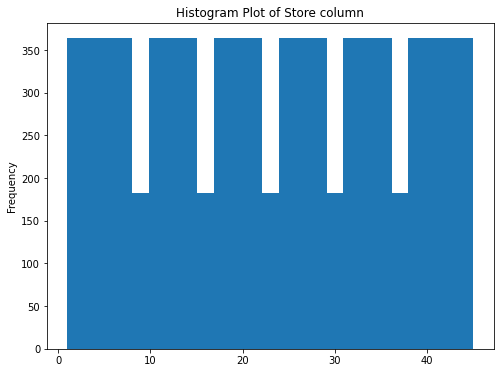

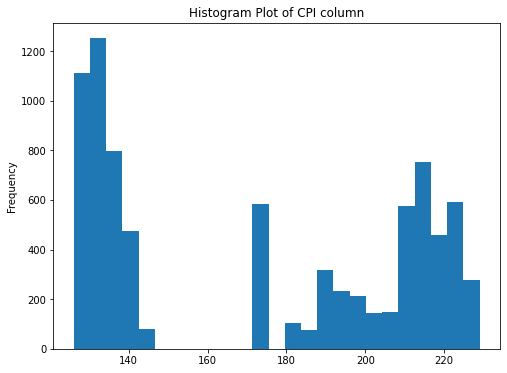

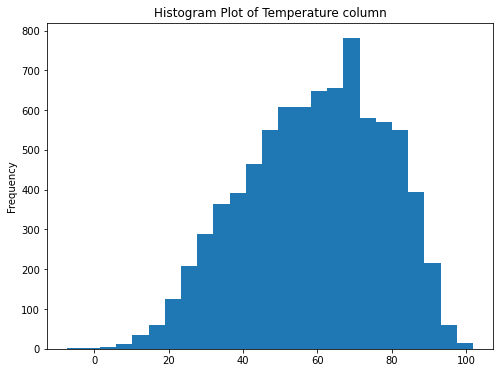

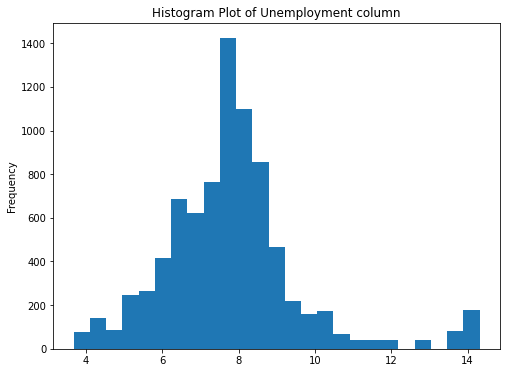

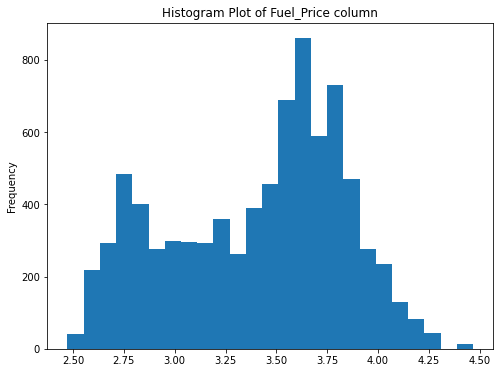



---------- EDA for categorical columns ----------


,IsHoliday
most_frequent,False
number_of_values,2


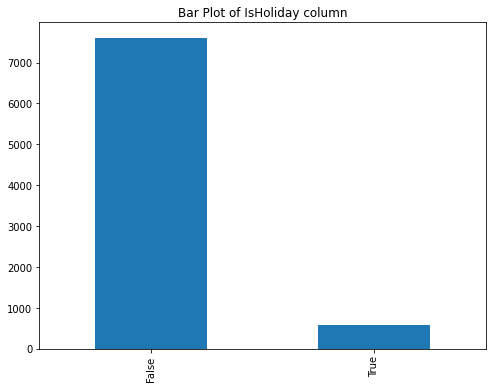



---------- EDA for non categorical columns ----------
These columns has unique values above 15:
1- Date has 182 unique values


In [9]:
# calling output()
features_dataset.output()

## 04.02 Sales Dataset

In [10]:
# define sales_dataset object
sales_dataset = Dataset(link_path=retail_sales_path, drop_missing_ratio=0.2)

Loading of dataframe done successfully in your object...

We have three attributes in this object:
 1- df: The dataframe is saved here.
 2- drop_missing_ratio: the minimum ratio of missing data inside the columns to be dropped  current value is 0.2.
 3- cat_cols_max_unique: the maximum number of unique values inside non numeric columns any column has more than this number of unique values will not be plotted current value is 15.

For the auto cleaning and EDA, call ".output()" method.


---------- Dataframe informations ----------
1- Number of columns: 5
2- Number of rows: 421570
3- First 5 rows:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


4- Data Types:


,columns
numeric,"Store, Dept, Weekly_Sales"
categorical,IsHoliday
non_categorical,Date




---------- Handling missing values ----------
Congrats, dataframe does not have missing values.


---------- EDA for numerical columns ----------


,Store,Dept,Weekly_Sales
min_value,1.000000,1.000000,-4988.940000
max_value,45.000000,99.000000,693099.360000
mean,22.200546,44.260317,15981.258123
median,22.000000,37.000000,7612.030000
number_of_values,45.000000,81.000000,359464.000000


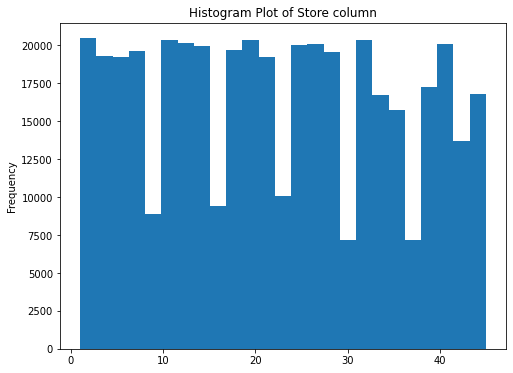

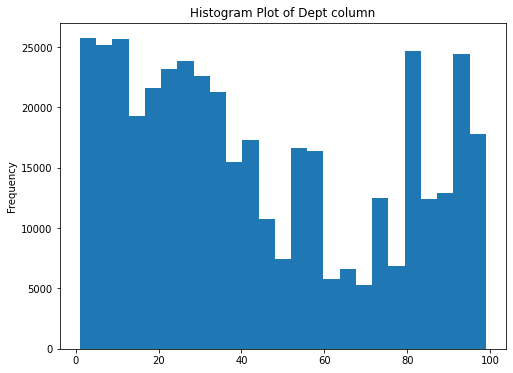

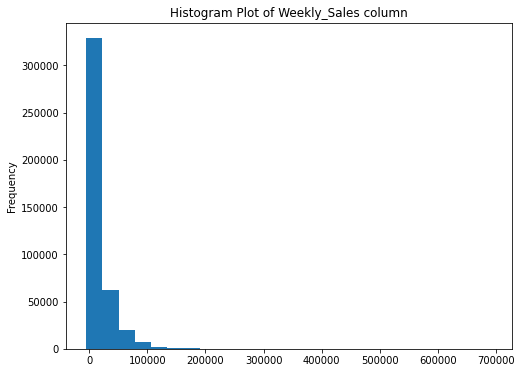



---------- EDA for categorical columns ----------


,IsHoliday
most_frequent,False
number_of_values,2


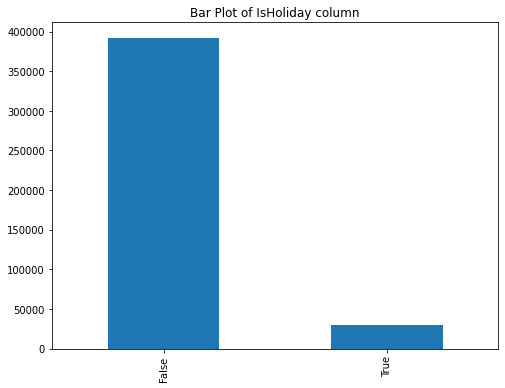



---------- EDA for non categorical columns ----------
These columns has unique values above 15:
1- Date has 143 unique values


In [11]:
# call output()
sales_dataset.output()

## 04.03 Stores Datset

In [12]:
# define stores_dataset object
stores_dataset = Dataset(link_path=retail_stores_path, drop_missing_ratio=0.2)

Loading of dataframe done successfully in your object...

We have three attributes in this object:
 1- df: The dataframe is saved here.
 2- drop_missing_ratio: the minimum ratio of missing data inside the columns to be dropped  current value is 0.2.
 3- cat_cols_max_unique: the maximum number of unique values inside non numeric columns any column has more than this number of unique values will not be plotted current value is 15.

For the auto cleaning and EDA, call ".output()" method.


---------- Dataframe informations ----------
1- Number of columns: 3
2- Number of rows: 45
3- First 5 rows:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


4- Data Types:


,columns
numeric,"Store, Size"
categorical,Type
non_categorical,None




---------- Handling missing values ----------
Congrats, dataframe does not have missing values.


---------- EDA for numerical columns ----------


,Store,Size
min_value,1.0,34875.0
max_value,45.0,219622.0
mean,23.0,130287.6
median,23.0,126512.0
number_of_values,45.0,40.0


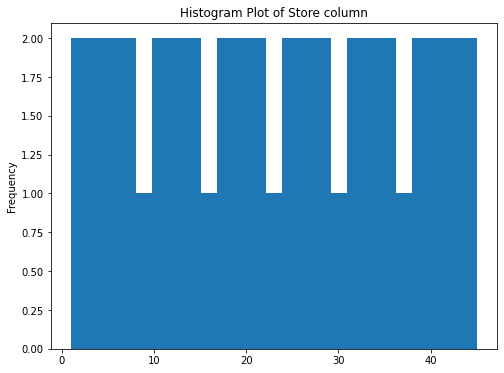

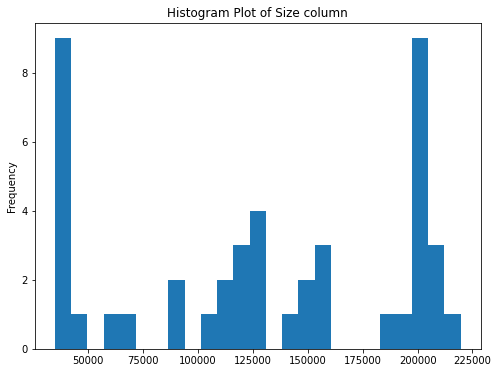



---------- EDA for categorical columns ----------


,Type
most_frequent,A
number_of_values,3


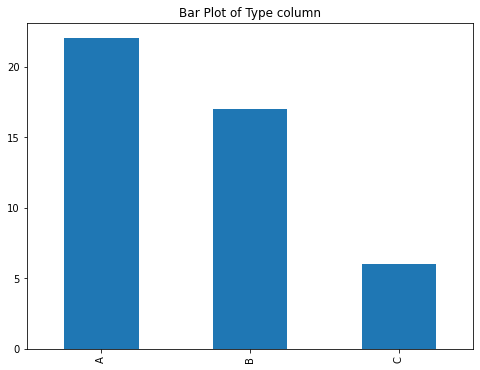



---------- EDA for non categorical columns ----------
No non categorical columns in the dataset.



In [13]:
# call output()
stores_dataset.output()

# 05 Police Dataset

In [14]:
# define police_dataset object
police_dataset = Dataset(link_path=police_path, drop_missing_ratio=0.2)

Loading of dataframe done successfully in your object...

We have three attributes in this object:
 1- df: The dataframe is saved here.
 2- drop_missing_ratio: the minimum ratio of missing data inside the columns to be dropped  current value is 0.2.
 3- cat_cols_max_unique: the maximum number of unique values inside non numeric columns any column has more than this number of unique values will not be plotted current value is 15.

For the auto cleaning and EDA, call ".output()" method.


---------- Dataframe informations ----------
1- Number of columns: 14
2- Number of rows: 5416
3- First 5 rows:


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


4- Data Types:


,columns
numeric,"id, age"
categorical,"manner_of_death, gender, race, signs_of_mental_illness, threat_level, flee, body_camera"
non_categorical,"name, date, armed, city, state"




---------- Handling missing values ----------
Dataframe has missing values, details are below:


,missing_count,missing_ratio
race,521,0.096196
flee,249,0.045975
age,235,0.043390
armed,227,0.041913
gender,2,0.000369


Filling numerical missing columns with the mean value...
Filling categorical missing columns with the most frequent value...
Filling non categorical missing columns with (Not Applicable) string...


Missing values had imputed, now dataframe is ready for EDA.


---------- EDA for numerical columns ----------


,id,age
min_value,3.000000,6.000000
max_value,5927.000000,91.000000
mean,3010.398264,37.117931
median,3009.500000,36.000000
number_of_values,5416.000000,78.000000


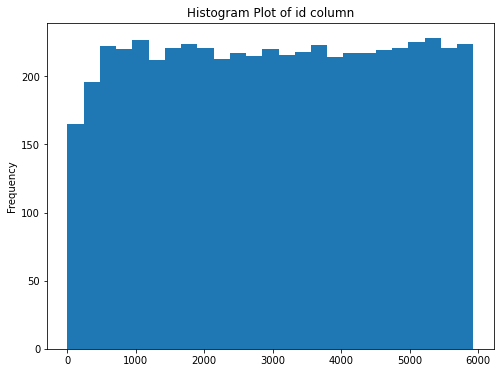

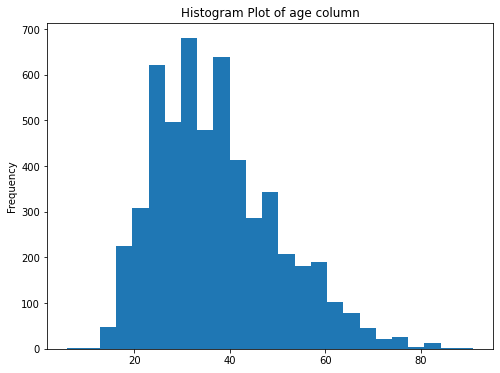



---------- EDA for categorical columns ----------


,manner_of_death,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
most_frequent,shot,M,W,False,attack,Not fleeing,False
number_of_values,2,2,6,2,3,4,2


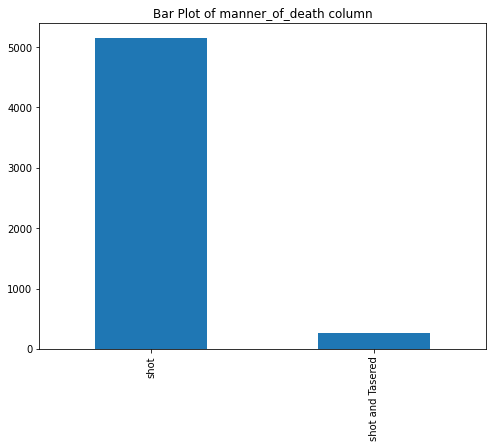

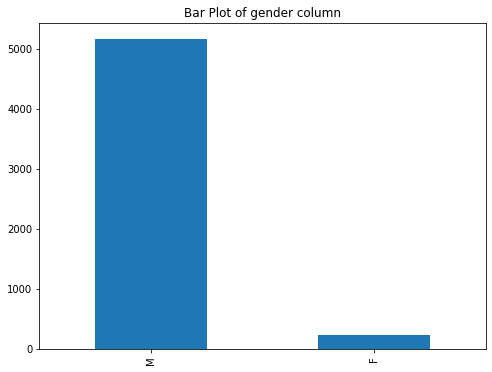

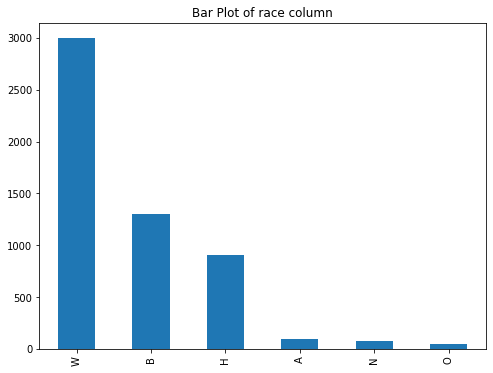

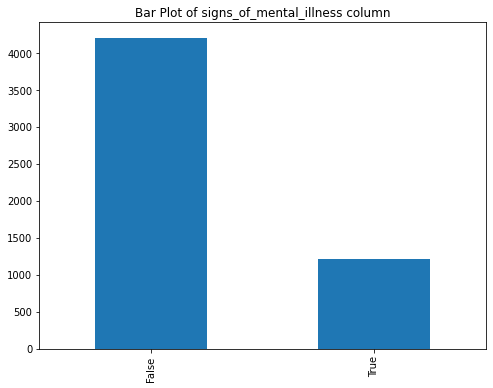

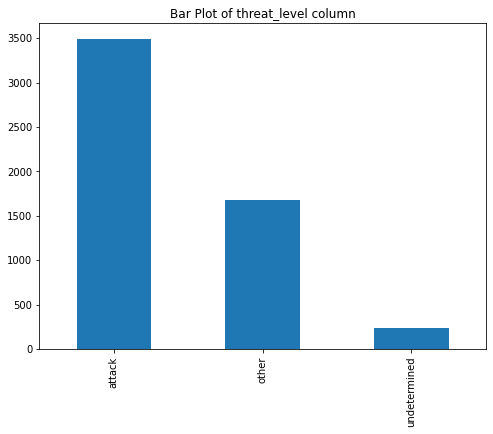

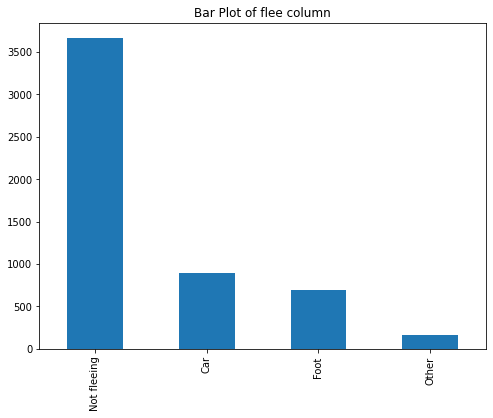

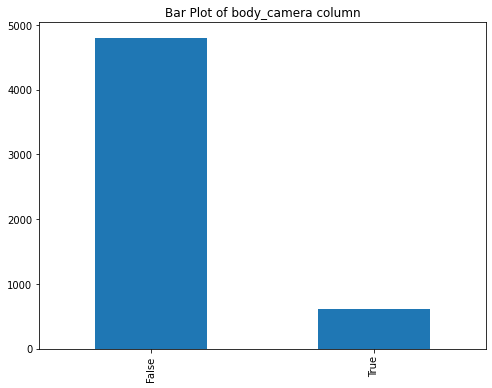



---------- EDA for non categorical columns ----------
These columns has unique values above 15:
1- name has 5206 unique values
2- date has 1844 unique values
3- armed has 94 unique values
4- city has 2470 unique values
5- state has 51 unique values


In [15]:
# call output()
police_dataset.output()